In [1]:
import pandas as pd

 1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`. 

In [2]:
physicians = pd.read_csv('../data/primary_care_physicians.csv')

 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.

In [3]:
physicians.head()

,FIPS,state,county,primary_care_physicians
0,1001,Alabama,Autauga,26.0
1,1003,Alabama,Baldwin,153.0
2,1005,Alabama,Barbour,8.0
3,1007,Alabama,Bibb,12.0
4,1009,Alabama,Blount,12.0


In [4]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']
physicians.shape

(95, 4)

 3. Look at the distribution of the number of primary care physicians. What do you notice?

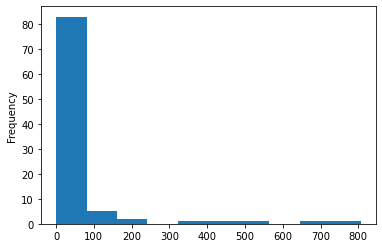

In [5]:
physicians['primary_care_physicians'].plot(kind = 'hist');

 4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.

In [6]:
population = pd.read_csv('../data/population_by_county.csv')

In [7]:
population.head()

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


 5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.

In [8]:
population = population.loc[population['state'] == 'TENNESSEE']
population['county'] = population['county'].str.rsplit(' ', expand = True, n = 1)[0]
population.head()

,FIPS,population,county,state,urban
283,47165,183437,Sumner,TENNESSEE,Urban
284,47169,10231,Trousdale,TENNESSEE,Urban
285,47027,7654,Clay,TENNESSEE,Rural
405,47157,936374,Shelby,TENNESSEE,Urban
406,47077,27977,Henderson,TENNESSEE,Rural


In [9]:
physicians = pd.merge(left = physicians, right = population[['population', 'urban', 'county']])
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban
0,47001,Tennessee,Anderson,39.0,76061,Urban
1,47003,Tennessee,Bedford,15.0,48292,Rural
2,47005,Tennessee,Benton,3.0,16140,Rural
3,47007,Tennessee,Bledsoe,1.0,14836,Rural
4,47009,Tennessee,Blount,90.0,129927,Urban


 6. How many Tennessee counties are considered urban?

In [10]:
physicians['urban'].value_counts()['Urban']

38

 7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 

In [11]:
physicians['residents_per_pcp'] = physicians['population']/physicians['primary_care_physicians']
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333


In [12]:
adequate = physicians.loc[physicians['residents_per_pcp'] < 1500]
mod_inadequate = physicians.loc[(physicians['residents_per_pcp'] >= 1500) & (physicians['residents_per_pcp'] < 3500)]
low_inadequate = physicians.loc[physicians['residents_per_pcp'] >= 3500]

In [13]:
print('number of adequate counties: ', adequate.shape[0])
print('number of moderately inadequate counties: ', mod_inadequate.shape[0])
print('number of low inadequate counties: ', low_inadequate.shape[0])

number of adequate counties:  14
number of moderately inadequate counties:  50
number of low inadequate counties:  31


 8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

<AxesSubplot:xlabel='urban', ylabel='primary_care_physicians'>

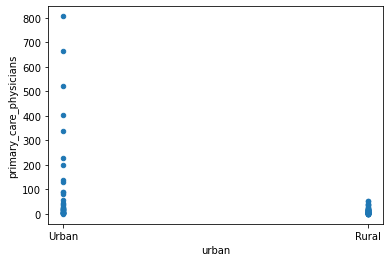

In [14]:
physicians.plot(kind = 'scatter', x = 'urban', y = 'primary_care_physicians')

---

# Week 3

In [15]:
import matplotlib.pyplot as plt

1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```

In [16]:
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [17]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate


2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.

In [18]:
physicians.groupby(["urban", "shadac_category"]).size()

urban  shadac_category      
Rural  adequate                  5
       low inadequate           21
       moderately inadequate    31
Urban  adequate                  9
       low inadequate           10
       moderately inadequate    19
dtype: int64

In [19]:
pd.crosstab(physicians['urban'], physicians['shadac_category'],  normalize = 'index')

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,0.087719,0.368421,0.54386
Urban,0.236842,0.263158,0.50000


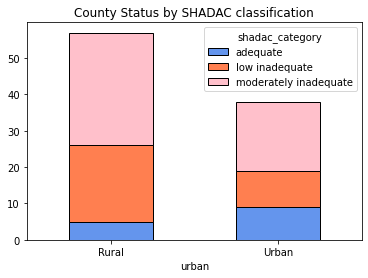

In [20]:
pd.crosstab(physicians['urban'], physicians['shadac_category']).plot(kind = 'bar',
                                                          stacked = True,       # stacked as opposed to side-by-side
                                                          color = ['cornflowerblue', 'coral', 'pink'],     # change the default colors
                                                          edgecolor = 'black')              # add a border to the bars
plt.title('County Status by SHADAC classification')                   # add a title
plt.xticks(rotation = 0); 

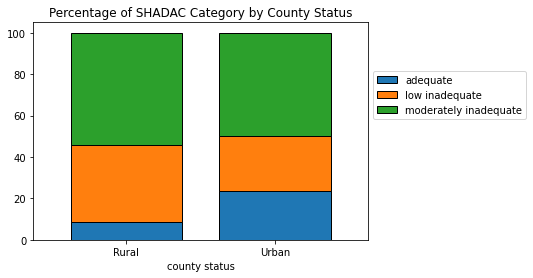

In [21]:
(pd.crosstab(physicians['urban'], physicians['shadac_category'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Percentage of SHADAC Category by County Status')
plt.xlabel('county status')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.

In [22]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')

In [23]:
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [24]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate


In [25]:
physicians.shape

(95, 8)

In [26]:
unemployment['Period'].value_counts()

Mar-21    95
Name: Period, dtype: int64

In [27]:
unemployment['Name'] = unemployment['Name'].str.split(' County', n =1, expand = True)[0]

In [28]:
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,Benton,Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,Bledsoe,Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,Blount,Mar-21,64098,61119,2979,4.6


In [29]:
unemployment[['Name', 'LF', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'})

,county,LF,Employed,Unemployed,unemployment_rate
0,Anderson,34704,33010,1694,4.9
1,Bedford,20623,19550,1073,5.2
2,Benton,6723,6305,418,6.2
3,Bledsoe,4252,3947,305,7.2
4,Blount,64098,61119,2979,4.6
...,...,...,...,...,...
90,Wayne,6416,6074,342,5.3
91,Weakley,15494,14783,711,4.6
92,White,12085,11484,601,5.0
93,Williamson,129484,125213,4271,3.3


In [30]:
phys_unemploy = pd.merge(left = physicians,
         right = unemployment[['Name', 'LF', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county'}))

In [31]:
phys_unemploy.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6


4. How do unemployment rates compare for urban counties versus rural counties?

In [32]:
phys_unemploy.groupby('urban')['unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


In [33]:
import seaborn as sns

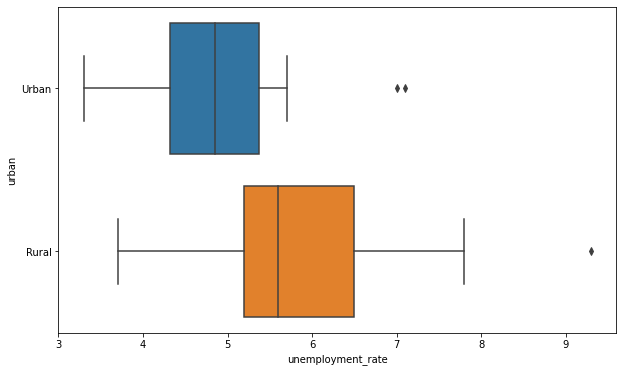

In [34]:
plt.figure(figsize = (10,6))
sns.boxplot(data = phys_unemploy,
           x = 'unemployment_rate',
           y = 'urban');

5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?

In [35]:
phys_unemploy['pcp_per_100k'] = phys_unemploy['primary_care_physicians'] / phys_unemploy['population'] * 100000

In [36]:
phys_unemploy.head()

,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,47001,Tennessee,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,34704,33010,1694,4.9,51.274635
1,47003,Tennessee,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,20623,19550,1073,5.2,31.061045
2,47005,Tennessee,Benton,3.0,16140,Rural,5380.000000,low inadequate,6723,6305,418,6.2,18.587361
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,4252,3947,305,7.2,6.740361
4,47009,Tennessee,Blount,90.0,129927,Urban,1443.633333,adequate,64098,61119,2979,4.6,69.269667


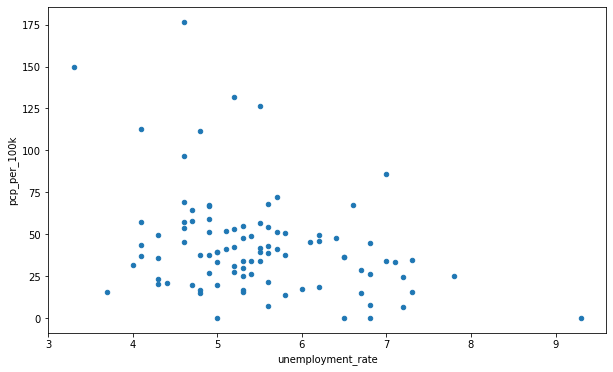

In [37]:
phys_unemploy.plot(kind = 'scatter',
             x = 'unemployment_rate',
             y = 'pcp_per_100k',
             figsize = (10,6));

In [38]:
phys_unemploy[['unemployment_rate', 'pcp_per_100k']].corr()#.loc['unemployment_rate', 'pcp_per_100k']

,unemployment_rate,pcp_per_100k
unemployment_rate,1.000000,-0.335333
pcp_per_100k,-0.335333,1.000000


---

# Week 4

In [39]:
import geopandas as gpd

1. Create a choropleth showing the unemployment rate per county for each Tennessee county.

In [61]:
counties = gpd.read_file('../data/county/tncounty.shp')

In [62]:
counties = pd.merge(left = counties,
                    right = phys_unemploy,
                   left_on = 'NAME',
                   right_on = 'county')
counties.head()

,OBJECTID,NAME,KEY,SHAPE_AREA,SHAPE_LEN,geometry,FIPS,state,county,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,LF,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,76,Chester,47023,8.049024e+09,520461.080124,"POLYGON ((1137985.762 344601.643, 1137965.070 ...",47023,Tennessee,Chester,4.0,17190,Urban,4297.500000,low inadequate,8424,8062,362,4.3,23.269343
1,77,Wayne,47181,2.050741e+10,666520.678598,"POLYGON ((1365052.057 391716.806, 1365746.554 ...",47181,Tennessee,Wayne,5.0,16693,Rural,3338.600000,moderately inadequate,6416,6074,342,5.3,29.952675
2,78,Tipton,47167,1.319125e+10,865093.887634,"MULTIPOLYGON (((886814.330 400456.525, 886774....",47167,Tennessee,Tipton,17.0,61447,Urban,3614.529412,low inadequate,27741,26295,1446,5.2,27.666119
3,79,Hamilton,47065,1.604776e+10,652926.001078,"POLYGON ((2274954.438 239788.911, 2274090.610 ...",47065,Tennessee,Hamilton,403.0,360919,Urban,895.580645,adequate,182548,173702,8846,4.8,111.659403
4,80,Stewart,47161,1.375003e+10,490090.336180,"POLYGON ((1382472.783 743972.302, 1382445.171 ...",47161,Tennessee,Stewart,1.0,13427,Urban,13427.000000,low inadequate,5451,5146,305,5.6,7.447680


In [45]:
counties.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   OBJECTID                 95 non-null     int64   
 1   NAME                     95 non-null     object  
 2   KEY                      95 non-null     object  
 3   SHAPE_AREA               95 non-null     float64 
 4   SHAPE_LEN                95 non-null     float64 
 5   geometry                 95 non-null     geometry
 6   FIPS                     95 non-null     int64   
 7   state                    95 non-null     object  
 8   county                   95 non-null     object  
 9   primary_care_physicians  95 non-null     float64 
 10  population               95 non-null     int64   
 11  urban                    95 non-null     object  
 12  residents_per_pcp        95 non-null     float64 
 13  shadac_category          95 non-null     object  
 14  LF  

```
counties = pd.merge(left = phys_unemploy,
         right = counties.rename(columns = {'NAME': 'county'}))
from geopandas import GeoDataFrame
counties = GeoDataFrame(counties)
type(counties)
```

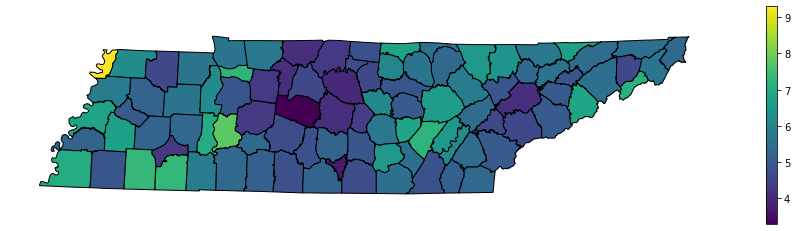

In [72]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate',
              edgecolor = 'black',
              legend = True,
              ax = ax)
ax.axis('off');

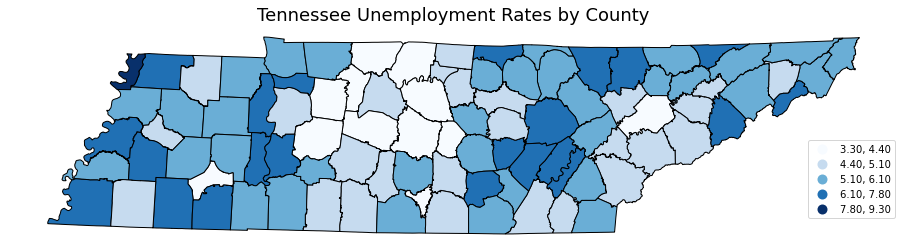

In [65]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'unemployment_rate',
              edgecolor = 'black',
              legend = True,
              cmap = 'Blues',
              scheme='NaturalBreaks',
              ax = ax)
# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
# Add a title
plt.title('Tennessee Unemployment Rates by County', fontsize = 18)
ax.axis('off');

2. Create a choropleth showing the SHADAC category for each county (adequate, low inadequate, and moderately inadequate).

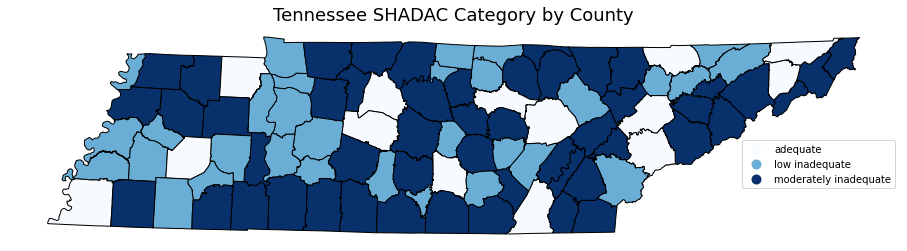

In [68]:
fig, ax = plt.subplots(figsize=(16,4))
counties.plot(column = 'shadac_category',
              edgecolor = 'black',
              legend = True,
              cmap = 'Blues',
              #scheme='NaturalBreaks',
              ax = ax)
# Position the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
# Add a title
plt.title('Tennessee SHADAC Category by County', fontsize = 18)
ax.axis('off');